In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,f1_score,r2_score
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('H:\DATA\MY\practice\Practice-29\milknew.csv')
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [5]:
print(data.info())
print(data.shape)
print(Counter(data['Grade']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB
None
(1059, 8)
Counter({'low': 429, 'medium': 374, 'high': 256})


In [6]:
print(data.isnull().sum())

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64


In [7]:
model = RandomForestClassifier()

X = data.drop('Grade', axis = 1)
Y = data['Grade']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('the model accuracy : ',accuracy)
print(report)

the model accuracy :  0.9952830188679245
              precision    recall  f1-score   support

        high       0.98      1.00      0.99        48
         low       1.00      0.99      0.99        78
      medium       1.00      1.00      1.00        86

    accuracy                           1.00       212
   macro avg       0.99      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212



In [9]:
cv_score = cross_val_score(model, X, Y, cv= 5, scoring='accuracy')

print('the cross validation score : ',cv_score)
print('the mean cross validation score : ',cv_score.mean())

the cross validation score :  [0.99056604 1.         1.         1.         0.99052133]
the mean cross validation score :  0.9962174729500134


<Axes: >

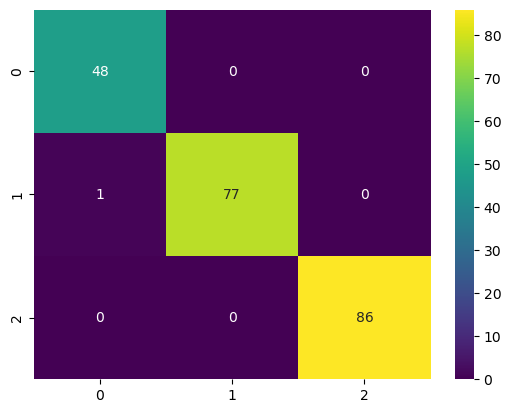

In [12]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='viridis')